# Learning Packet Analysis with Data Science

In [110]:
from scapy.all import * # Packet manipulation
import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff (don't worry only used for one line :] )
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline



### The line below will attempt to sniff 10 packets
#### You can kill the sniffing operation with the stop button in the notebook

In [111]:
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)

# rdpcap returns packet list
## packetlist object can be enumerated 
print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:96 UDP:3 ICMP:0 Other:1>


<Ether  dst=01:00:5e:7f:ff:fa src=00:0e:09:86:b4:53 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=201 id=43434 flags= frag=0 ttl=1 proto=udp chksum=0xd85d src=172.16.155.17 dst=239.255.255.250 |<UDP  sport=62322 dport=ssdp len=181 chksum=0x810e |<Raw  load='M-SEARCH * HTTP/1.1\r\nHOST: 239.255.255.250:1900\r\nMAN: "ssdp:discover"\r\nMX: 1\r\nST: urn:dial-multiscreen-org:service:dial:1\r\nUSER-AGENT: Microsoft Edge/90.0.818.66 Windows\r\n\r\n' |>>>>

# Append Krack pcap to current stream

In [112]:
# rdpcap used to Read Pcap
pcap = pcap +  rdpcap("krack_small.pcap")

In [113]:
pcap[101]

<RadioTap  version=0 pad=0 len=23 present=TSFT+Flags+Rate+Channel+dBm_AntSignal mac_timestamp=165062 Flags=wep+fragment+FCS Rate=11.0 Mbps ChannelFrequency=2412 ChannelFlags=Turbo+2GHz+Dynamic_CCK_OFDM dBm_AntSignal=-54 dBm notdecoded='' |<Dot11FCS  subtype=QoS Data type=Data proto=0 FCfield=from-DS+MD+protected ID=29952 addr1=ea:6d:39:a3:85:3a (RA=DA) addr2=c4:b9:cd:7c:d9:e4 (TA=BSSID) addr3=00:5d:73:e4:20:07 (SA) SC=2544 fcs=0x7770a72b |<Dot11QoS  A_MSDU_Present=0 Ack_Policy=0 EOSP=0 TID=0 TXOP=0 |<Dot11CCMP  PN0=160 PN1=0 res0=0 key_id=0 ext_iv=1 res1=0 PN2=0 PN3=0 PN4=0 PN5=0 data='\x17jC0O\\xe8\\xc4\\xc1\\x9b\x19|\x05\n\x10w]\tN\\x96\x16\\x96\\xc9Y!\\x8b\\xda8=c\\xb0\\xdb\\xd3յ\\xaf\\xfc\\xe2\\xf3\\xb3\\xe6\\xe4\\x91\\xfd\\xb0\x18.\\xf2\\xf1\\xb0el\\xf8\\x8d\\xb13\\xf3\r\\x86\\x9a\\x9a7\\x94\\x9b\\xd7ݏ\\xa1Q\\xec\\xe7)\\x9d\x1f\\x94\\xb5`(\\x9f}E2\x1e!\\\\xd8Hx\\xa1\x0eԀ\x15\\x8a\\x9cz\\xa8\\xebea\x16\\xc7C/P\\xb2\\xe7\\xa1]\\xfc.\\xfd&\x13\\xba\\xbc7>\\xe6\\xabDa]\\xcd\\xde\\xce+

# 802.11 FCS/QOS/CCMP Segment
#### Frames/Packets/Segments each encapsulated layer consists of fields

# Exploring an item in packet list

In [167]:
# Radio -> 802.11 -> Layer 2 Segments
# We're only interested in Layers 2 (802.11) 
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
radio_frame = pcap[103]
wireless_packet = radio_frame.payload
segment = wireless_packet.payload
dot11_ccmp = segment.payload
data = dot11_ccmp.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(radio_frame.summary())
print(wireless_packet.summary())
print(segment.summary())
print(dot11_ccmp.summary())
print(data.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
radio_frame.show()

RadioTap / 802.11 Data QoS Data c4:b9:cd:7c:d9:e4 (TA=BSSID) > ea:6d:39:a3:85:3a (RA=DA) / Dot11QoS / Dot11CCMP
802.11 Data QoS Data c4:b9:cd:7c:d9:e4 (TA=BSSID) > ea:6d:39:a3:85:3a (RA=DA) / Dot11QoS / Dot11CCMP
Dot11QoS / Dot11CCMP
Dot11CCMP

###[ RadioTap ]### 
  version   = 0
  pad       = 0
  len       = 23
  present   = TSFT+Flags+Rate+Channel+dBm_AntSignal
  mac_timestamp= 167942
  Flags     = wep+fragment+FCS
  Rate      = 11.0 Mbps
  ChannelFrequency= 2412
  ChannelFlags= Turbo+2GHz+Dynamic_CCK_OFDM
  dBm_AntSignal= -55 dBm
  notdecoded= ''
###[ 802.11-FCS ]### 
     subtype   = QoS Data
     type      = Data
     proto     = 0
     FCfield   = from-DS+MD+protected
     ID        = 29952
     addr1     = ea:6d:39:a3:85:3a (RA=DA)
     addr2     = c4:b9:cd:7c:d9:e4 (TA=BSSID)
     addr3     = 00:5d:73:e4:20:07 (SA)
     SC        = 2576
     fcs       = 0xfe39c073
###[ 802.11 QoS ]### 
        A_MSDU_Present= 0
        Ack_Policy= 0
        EOSP      = 0
        TID       = 0
 

### Understanding object types in scapy and Importing layers

In [118]:
# Understanding the object types in scapy
print(type(radio_frame))
print(type(wireless_packet))
print(type(segment))
print(type(dot11_ccmp))


# Packets can be filtered on layers ie) radio_frame[scapy.layers.l2.Ether]
radio_type = type(radio_frame)
wireless_type = type(wireless_packet)
qos_type = type(segment)
ccmp_type = type(dot11_ccmp)
print("Radio",pcap[radio_type])
print("802.11", pcap[wireless_type])
print("QoS", pcap[qos_type])
print("CCMP", pcap[ccmp_type])

# Scapy provides this via import statements
from scapy.layers.dot11 import RadioTap
from scapy.layers.dot11 import Dot11FCS
from scapy.layers.dot11 import Dot11QoS
from scapy.layers.dot11 import Dot11CCMP



<class 'scapy.layers.dot11.RadioTap'>
<class 'scapy.layers.dot11.Dot11FCS'>
<class 'scapy.layers.dot11.Dot11QoS'>
<class 'scapy.layers.dot11.Dot11CCMP'>
Radio <RadioTap from Sniffed+krack_small.pcap: TCP:0 UDP:0 ICMP:0 Other:2000>
802.11 <Dot11FCS from Sniffed+krack_small.pcap: TCP:0 UDP:0 ICMP:0 Other:1319>
QoS <Dot11QoS from Sniffed+krack_small.pcap: TCP:0 UDP:0 ICMP:0 Other:563>
CCMP <Dot11CCMP from Sniffed+krack_small.pcap: TCP:0 UDP:0 ICMP:0 Other:537>


# Convert PCAP to DataFrame

In [134]:
# Collect field names from FCS/QoS/CCMP (These will be columns in DF)
fcs_fields = [field.name for field in Dot11FCS().fields_desc]
qos_fields = [field.name for field in Dot11QoS().fields_desc]
ccmp_fields = [field.name for field in Dot11CCMP().fields_desc]
print(fcs_fields)
dataframe_fields = fcs_fields  + qos_fields + ccmp_fields
print(dataframe_fields)
# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[Dot11FCS]:
    # Field array for each row of DataFrame
    field_values = []
    # Add all IP fields to dataframe
    for field in fcs_fields:
        #print(field)
        try:
            if field == 'cfe' or field == 'addr4':
                # Retrieving number of options defined in IP Header
                #field_values.append(len(packet[Dot11FCS].fields[field]))
                field_values.append(1)
            else:
                field_values.append(packet[Dot11FCS].fields[field])
        except: 
            field_values.append(0)
    #field_values.append(packet.time)
    
    layer_type = type(packet[Dot11FCS].payload)
    #print('--->')
    #print(layer_type)
    for field in qos_fields:
        try:
            field_values.append(packet[layer_type].fields[field])
        except: 
            field_values.append(0)
       
    layer_type1 = type(packet[Dot11FCS].payload.payload)    
    #print(layer_type1)
    #print('--->')
    for field in ccmp_fields:
        try:
            field_values.append(packet[layer_type1].fields[field])
        except:
            field_values.append(None)
    
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs']
['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs', 'A_MSDU_Present', 'Ack_Policy', 'EOSP', 'TID', 'TXOP', 'PN0', 'PN1', 'res0', 'key_id', 'ext_iv', 'res1', 'PN2', 'PN3', 'PN4', 'PN5', 'data']


### DataFrame Basics

In [135]:
# Retrieve first row from DataFrame
print(df.iloc[0])

print(df.shape)

# Return first 5 rows
df.head()

# Return last 5 rows
df.tail()

# Return the Source Address for all rows
df['addr1']

# Return Src Address, Dst Address, Src Port, Dst Port
df[['ID','addr1','addr2','fcs','PN0']]

subtype                                                           8
type                                                              2
proto                                                             0
cfe                                                               1
FCfield                                        from-DS+MD+protected
ID                                                            29952
addr1                                             ea:6d:39:a3:85:3a
addr2                                             c4:b9:cd:7c:d9:e4
addr3                                             00:5d:73:e4:20:07
SC                                                             2544
addr4                                                             1
fcs                                                      2003871531
A_MSDU_Present                                                    0
Ack_Policy                                                        0
EOSP                                            

,ID,addr1,addr2,fcs,PN0
0,29952,ea:6d:39:a3:85:3a,c4:b9:cd:7c:d9:e4,2003871531,160
1,29952,ea:6d:39:a3:85:3a,c4:b9:cd:7c:d9:e4,2935172062,161
2,29952,ea:6d:39:a3:85:3a,c4:b9:cd:7c:d9:e4,4265197683,162
3,29952,ea:6d:39:a3:85:3a,c4:b9:cd:7c:d9:e4,4124576176,163
4,29952,ea:6d:39:a3:85:3a,c4:b9:cd:7c:d9:e4,3512848044,164
...,...,...,...,...,...
1314,0,ff:ff:ff:ff:ff:ff,74:da:88:06:8e:4e,4223304063,None
1315,0,ff:ff:ff:ff:ff:ff,c4:b9:cd:7d:17:53,2183463914,None
1316,0,ff:ff:ff:ff:ff:ff,74:da:88:06:8e:4e,3440543327,None
1317,0,ff:ff:ff:ff:ff:ff,c4:b9:cd:7d:34:64,3435773323,None


# Statistics

In [194]:
# Top Source Adddress
print("# Top Source Address")
print(df['addr3'].describe(),'\n\n')

print("# Top Source Address")
print(df.groupby('addr3').describe(),'\n\n')


# Top Destination Address
print("# Top Destination Address")
print(df['addr1'].describe(),"\n\n")

frequent_address = df['addr3'].describe()['top']

# Who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(df[df['addr3'] == frequent_address]['addr1'].unique(),"\n\n")


print("# Associated id with top source addres")
print(df[df['addr3'] == frequent_address]['SC'].unique(),"\n\n")


print("# associated fcs with top source address")
print(df[df['addr3'] == frequent_address]['fcs'].unique(),"\n\n")

# Top Source Address
count     1319
unique      30
top          0
freq       493
Name: addr3, dtype: int64 


# Top Source Address
                  subtype                  type                 proto         \
                    count unique top freq count unique top freq count unique   
addr3                                                                          
0                     493      4  11  347   493      1   1  493   493      2   
00:00:0c:07:ac:15     100      1   8  100   100      1   2  100   100      1   
00:00:0c:07:ac:95       1      1   8    1     1      1   2    1     1      1   
00:00:0c:af:8c:00       1      1   8    1     1      1   2    1     1      1   
00:00:ec:4f:ac:15       1      1   8    1     1      1   2    1     1      1   
00:00:ff:bc:c0:98       1      1   8    1     1      1   2    1     1      1   
00:5d:73:e4:20:07     303      2   8  302   303      1   2  303   303      1   
25:5d:bf:0b:5a:10       1      1   8    1     1      1   2    1     1

# Associated id with top source addres
[0] 


# associated fcs with top source address
[4250826956 1488449508 3902793920 1938534653 2664564422 2668653809
 2626992287 2610761795 229903860 3044857846 1356907405 3510090426
 2641369083 296589522 996509355 2667799934 1344921719 4224802836
 1436615859 3500508383 1367757126 3508859193 2071183467 382724154
 1010465047 475942475 1665203516 2181745777 297718609 3445084065
 3275292181 3835068413 2355494341 2882239533 1568864693 2049734749
 316668517 896629645 624817940 1576631824 43218684 1784739012 1305376044
 2619961692 4107989860 1343516451 3799904015 2602494342 917233510
 4251507704 2509986240 2989873192 126631932 1631454096 665784429
 4199552498 1996579604 102789 1210768989 2259675749 1760695229 2228212579
 394174113 2398558908 2841221972 2486238743 2805377760 3485804760
 3899369776 965520704 2650035321 593934465 2722458904 995625471 1993453200
 1093903329 2975236261 3750339649 1072085667 2429855633 1274420713
 2957885091 499252231 744524484

In [140]:
# Unique Source Addresses
print("Unique Source Addresses")
print(df['addr3'].unique())

print()

# Unique Destination Addresses
print("Unique Destination Addresses")
print(df['addr1'].unique())

Unique Source Addresses
['00:5d:73:e4:20:07' 'c4:b9:cd:7c:d9:e3' 'c4:b9:cd:7c:d9:e4' 0
 '00:00:0c:07:ac:15' 'c4:e9:84:c3:e2:88' 'd8:0f:99:6c:16:4a'
 '8a:4b:d5:67:a4:d4' 'c4:b9:cd:7d:39:94' 'c4:b9:cd:7d:39:93'
 'd3:6e:01:b6:64:90' 'c4:b9:cd:7d:2b:a3' 'c4:b9:cd:7d:2b:a4'
 '74:da:88:06:8e:4e' 'c4:b9:cd:7d:34:63' 'c4:b9:cd:7d:17:53'
 'c4:b9:cd:7d:34:64' 'c4:b9:cd:7d:17:54' 'ff:ff:ff:ff:ff:ff'
 'a1:96:75:58:1c:b9' 'a8:65:72:e4:20:07' '25:5d:bf:0b:5a:10'
 '00:00:0c:af:8c:00' '71:e6:11:4b:16:4a' '80:00:0b:8a:a7:23'
 'cc:11:a2:b5:55:48' '00:00:ec:4f:ac:15' '00:00:ff:bc:c0:98'
 '00:00:0c:07:ac:95' '8e:a1:e2:2b:15:cf']

Unique Destination Addresses
['ea:6d:39:a3:85:3a' 'ff:ff:ff:ff:ff:ff' 'c4:e9:84:c3:e2:88'
 'cc:52:af:8e:85:f9' '80:00:0b:8a:a7:23' 'c4:b9:cd:7d:39:94'
 'd8:0f:99:6c:16:4a' 'df:07:b2:81:db:33' '4c:f2:02:11:fd:93'
 'b4:c4:fc:a0:89:cc' 'c0:cb:38:26:e5:a1' 'a6:ad:1a:04:10:44'
 'da:a1:19:a6:75:1e' '4c:f2:02:11:fd:1d' '1c:c3:45:94:cb:49'
 'e0:d4:64:85:4e:7c' 'cf:62:90:2a:d4:cf' '01:00:

# Graphing

addr3
0                        0.000000
00:00:0c:07:ac:15    85115.066937
00:00:0c:07:ac:95       41.346856
00:00:0c:af:8c:00      962.304260
00:00:ec:4f:ac:15      896.778905
Name: SC, dtype: float64


<AxesSubplot:title={'center':'source Addresses (Bytes Received)'}, ylabel='addr3'>

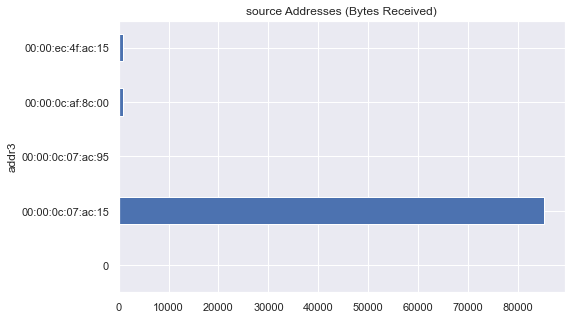

In [189]:
# Group by Source Address and Payload Sum
source_addresses = (df.groupby("addr3")['SC'].sum()/493*16).head()
print(source_addresses)
source_addresses.plot(kind='barh', title="source Addresses (Bytes Received)",figsize=(8,5))

addr1
e0:d4:64:85:4e:7c     889584
ea:6d:39:a3:85:3a    6908864
f4:43:5c:3c:37:94          0
f5:3d:dd:dd:04:77      60519
ff:ff:ff:ff:ff:ff    4335216
Name: SC, dtype: int64


<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr1'>

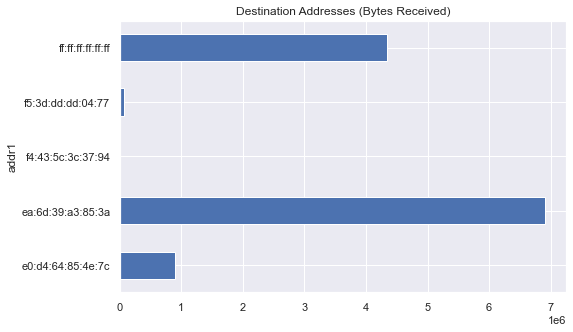

In [190]:
# Group by Destination Address and Payload Sum
destination_addresses = (df.groupby("addr1")['SC'].sum()).tail()
print(destination_addresses)
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr3'>

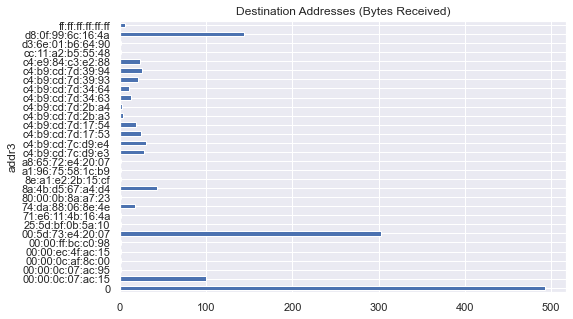

In [188]:
dest_freq=df.groupby('addr3').describe()['SC']['count']
dest_freq.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr1'>

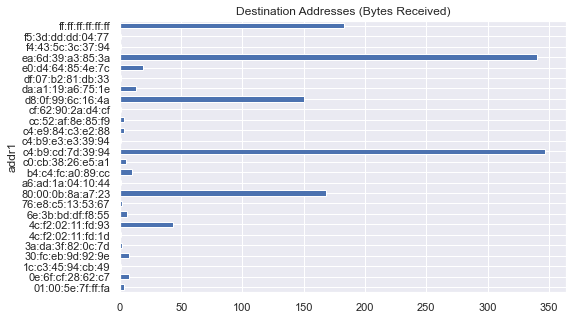

In [192]:
dest_freq=df.groupby('addr1').describe()['ID']['count']
dest_freq.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

Text(0.5, 1.0, 'History of bytes sent by most frequent address')

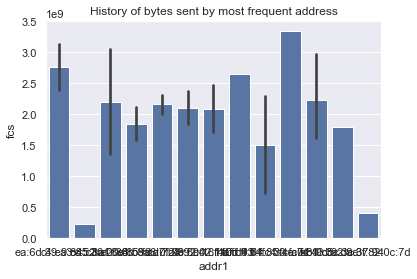

In [206]:
#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

frequent_address_df = df[df['addr3'] == frequent_address]
x = frequent_address_df['fcs'].tolist()
sns.barplot(x="addr1", y="fcs", data=frequent_address_df[['fcs','addr1']],
            label="Total", color="b").set_title("History of bytes sent by most frequent address")


# Payload Investigation